<a href="https://colab.research.google.com/github/kainight0/HWProj/blob/main/HyperparameterTurning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and print the iris dataset**

In [56]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**Use Kfold class and cross-validation**

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = iris.data
y = iris.target

k_range = range(1, 31)
mean_accuracy = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10)
  mean_accuracy.append(scores.mean())
  print("k =", k, "| Mean accuracy:", round(scores.mean(), 4))

k = 1 | Mean accuracy: 0.96
k = 2 | Mean accuracy: 0.9533
k = 3 | Mean accuracy: 0.9667
k = 4 | Mean accuracy: 0.9667
k = 5 | Mean accuracy: 0.9667
k = 6 | Mean accuracy: 0.9667
k = 7 | Mean accuracy: 0.9667
k = 8 | Mean accuracy: 0.9667
k = 9 | Mean accuracy: 0.9733
k = 10 | Mean accuracy: 0.9667
k = 11 | Mean accuracy: 0.9667
k = 12 | Mean accuracy: 0.9733
k = 13 | Mean accuracy: 0.98
k = 14 | Mean accuracy: 0.9733
k = 15 | Mean accuracy: 0.9733
k = 16 | Mean accuracy: 0.9733
k = 17 | Mean accuracy: 0.9733
k = 18 | Mean accuracy: 0.98
k = 19 | Mean accuracy: 0.9733
k = 20 | Mean accuracy: 0.98
k = 21 | Mean accuracy: 0.9667
k = 22 | Mean accuracy: 0.9667
k = 23 | Mean accuracy: 0.9733
k = 24 | Mean accuracy: 0.96
k = 25 | Mean accuracy: 0.9667
k = 26 | Mean accuracy: 0.96
k = 27 | Mean accuracy: 0.9667
k = 28 | Mean accuracy: 0.9533
k = 29 | Mean accuracy: 0.9533
k = 30 | Mean accuracy: 0.9533


**Determine the optimal k value**

In [58]:
import numpy as np

optimal_k = k_range[np.argmax(mean_accuracy)]
print("\nOptimal k value is", optimal_k)
print("Best cross-validated accuracy:", round(max(mean_accuracy), 4))


Optimal k value is 13
Best cross-validated accuracy: 0.98


**Plot  'Value of K for KNN' vs.  'Cross-Validated Accuracy'**

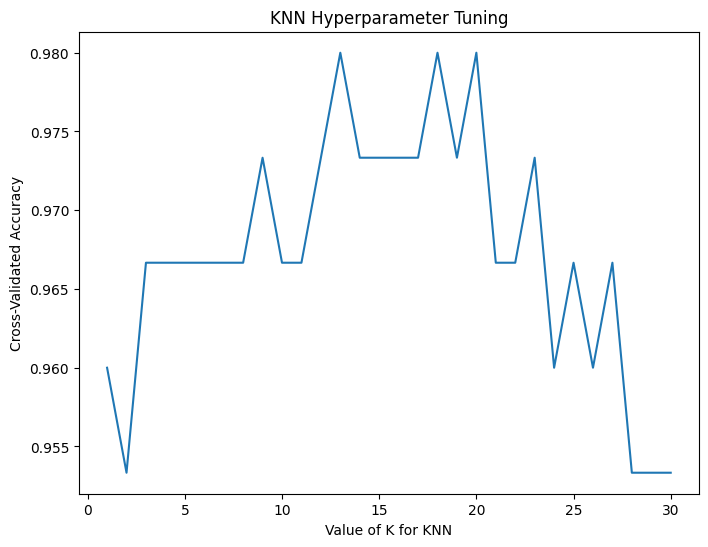

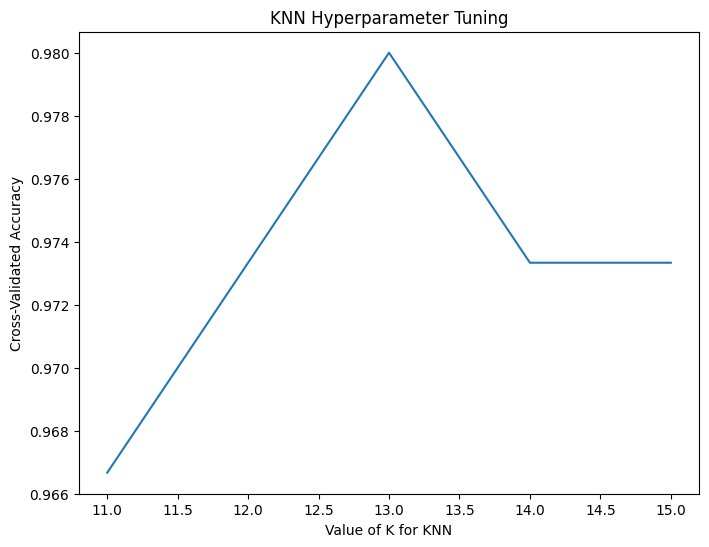

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(k_range, mean_accuracy)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

kslice = k_range[10:15]
accuracyslice = mean_accuracy[10:15]

plt.figure(figsize=(8,6))
plt.plot(kslice, accuracyslice)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

**Use GridSearchCV to confirm k=13 has the optimal parameter**

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(1, 31)}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X, y)

print("Best K found by GridSearchCV:", grid.best_params_['n_neighbors'])
print("Best cross-validated accuracy:", round(grid.best_score_, 4))

Best K found by GridSearchCV: 13
Best cross-validated accuracy: 0.98
